In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/Social_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
data.shape

(400, 5)

In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
data['Purchased'].nunique()

2

In [ ]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
data['Purchased'].value_counts(normalize=True)

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

In [ ]:
data=pd.get_dummies(data)

In [ ]:
data.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [ ]:
data['User ID'].nunique()

400

In [ ]:
## divided dataset into dependent and independent variable
x=data.drop(['User ID','Purchased'],axis=1)
y=data['Purchased']

In [ ]:
## spliting into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
### Applying Logistic regression (ini kanan pokunna ellaa algorithms um sklearn lu aanu ullathu )
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
## model creation
model=lr.fit(x_train,y_train)

In [ ]:
## predictions checking
y_predictions=model.predict(x_test)

In [ ]:
## model ethra nannaayi perform cheythu ennu ariyaan
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
## confusion matrics check cheyunu
confusion_matrix(y_test,y_predictions)

array([[52,  0],
       [28,  0]])

In [ ]:
y_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print('Accuracy= ',accuracy_score(y_test,y_predictions))
print('Precision= ',precision_score(y_test,y_predictions))
print('Recall= ',recall_score(y_test,y_predictions))
print('F1 Score= ',f1_score(y_test,y_predictions))

Accuracy=  0.65
Precision=  0.0
Recall=  0.0
F1 Score=  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
### KNN
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
from sklearn import neighbors
## Apropriate k value choose cheyanam
## so assigning empty list
metric_k=[]
## k value determine cheyaan oru range of values kodukunnu
neighbors = np.arange(3,15)

In [ ]:
for k in neighbors :
    classifier =KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

In [ ]:
metric_k

[0.8, 0.8, 0.825, 0.775, 0.8125, 0.775, 0.8, 0.775, 0.8, 0.775, 0.75, 0.7625]

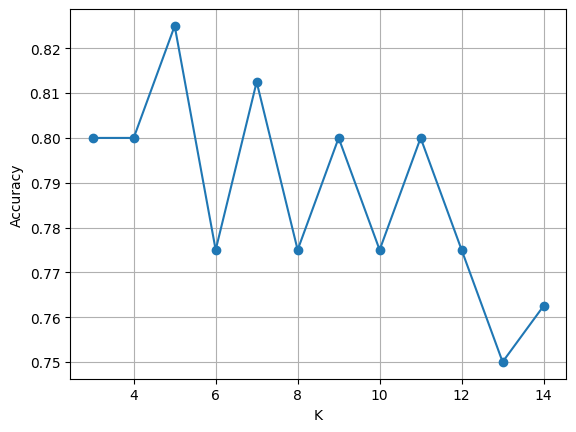

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()

In [ ]:
classifier =KNeighborsClassifier(n_neighbors= 5,metric='euclidean')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
acc=accuracy_score(y_test,y_pred)
metric_k.append(acc)

In [ ]:
print('Accuracy= ',accuracy_score(y_test,y_pred))
print('Precision= ',precision_score(y_test,y_pred))
print('Recall= ',recall_score(y_test,y_pred))
print('F1 Score= ',f1_score(y_test,y_pred))

Accuracy=  0.825
Precision=  0.7692307692307693
Recall=  0.7142857142857143
F1 Score=  0.7407407407407408


In [ ]:
confusion_matrix(y_test,y_pred)

array([[46,  6],
       [ 8, 20]])